# Neural Network Regression

# China analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

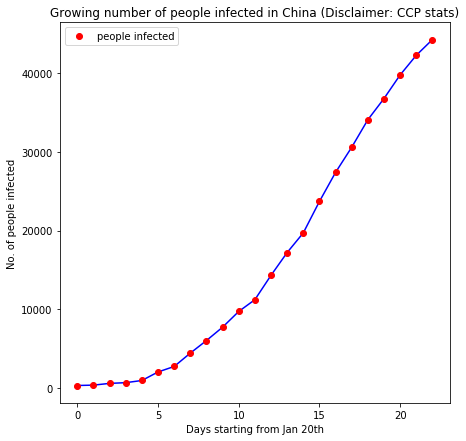

In [2]:
start = "Jan 20th" # start of keeping counts?
# current = "Feb 11th"
np_china = np.array([278, 326, 547, 639, 916, 2000, 2700, 4400, 6000, 7700, 9700, 11200, 14300, 17200, 19700, 23700, 27400, 
                     30600, 34100, 36800, 39800, 42300, 44300])

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected in China (Disclaimer: CCP stats)")

plt.plot(range(len(np_china)), np_china, 'b-')

for i in range(len(np_china)):
    a, = plt.plot(i, np_china[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

# Non-china analysis

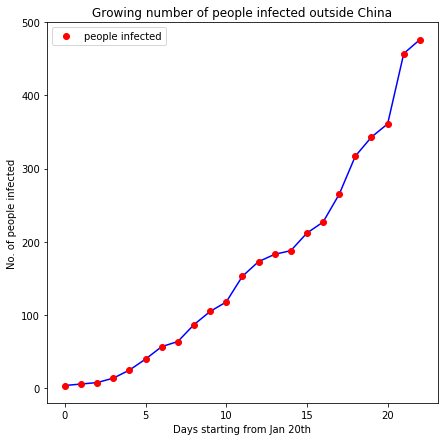

In [3]:
np_non = np.array([4, 6, 8, 14, 25, 40, 57, 64, 87, 105, 118, 153, 173, 183, 188, 212, 227, 265, 317, 343, 361, 457, 476])

plt.figure(figsize=(7, 7))
plt.xlabel("Days starting from " + start)
plt.ylabel("No. of people infected")
plt.title("Growing number of people infected outside China")

plt.plot(range(len(np_non)), np_non, 'b-')

for i in range(len(np_non)):
    a, = plt.plot(i, np_non[i], 'ro', label="people infected")

plt.legend(handles=[a])
plt.show()

In [4]:
np_days = np.arange(1, len(np_china)+1)

# Neural Networks

# A. Neural Network Regression - sklearn

In [6]:
from sklearn.neural_network import MLPRegressor

nnreg = MLPRegressor(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(100,), 
                     random_state=231, learning_rate_init=0.01, max_iter=100)

nnreg.fit(np_days.reshape(-1, 1), np_china.reshape(-1, 1))

#nnreg.predict(np_days.reshape(-1, 1))

print(nnreg)
ann = nnreg.predict(np.arange(1, len(np_china) + 1 + 10).reshape(-1, 1))
print(ann)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=231, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
[-1.36796053e+01  1.19576548e+02  3.94413589e+02  6.69250631e+02
  9.44087672e+02  1.77081858e+03  3.12239694e+03  4.47397530e+03
  5.82555365e+03  7.34451666e+03  9.50106756e+03  1.16576184e+04
  1.44269146e+04  1.75450887e+04  2.06632628e+04  2.37814369e+04
  2.68996109e+04  3.00177850e+04  3.31359591e+04  3.62541331e+04
  3.93723072e+04  4.24904813e+04  4.56086554e+04  4.87268294e+04
  5.18450035e+04  5.49631776e+04  5.80813516e+04  6.11995257e+04
  6.43176998e+04  6.74358738e+04  7.05540479e+04  7.36722220e+04
  7.67903961e+04]


C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


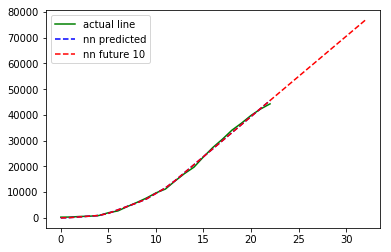

In [8]:
c = ['ro', 'b.', 'b--', 'r--']

one, = plt.plot(np.arange(len(np_china)), np_china, 'g-', label='actual line')
two, = plt.plot(np.arange(len(np_china)), ann[:len(np_china)], c[2], label='nn predicted')
three, = plt.plot(np.arange(len(np_china) + 10), ann, c[3], label='nn future 10')

plt.legend(handles=[one, two, three])

In [10]:
# final answer??
print("in the next 10 days, expected infected: ", ann[len(np_china):])

in the next 10 days, expected infected:  [48726.82942168 51845.00349219 54963.17756269 58081.3516332
 61199.52570371 64317.69977421 67435.87384472 70554.04791523
 73672.22198573 76790.39605624]


# Neural Network Regression - coded

In [11]:
'''layers = 2
hidden_nodes = 2
input_nodes = 1
output_nodes = 1
learning_rate = 0.1
no_iterations = 10

weight_mat = np.random.rand(hidden_nodes*(layers)).reshape(-1, 2)
bias_mat = np.random.rand(layers+1, 1)
input_data = np.arange(1, len(china)+1)
output_data = np.array(china)

# moving one epoch at a time
for epoch in range(no_iterations):
    grad = 0
    
    # batch wise training
    for vec in input_data:
        #grad += np.dot(vec, weight_mat)
        exp = vec
            
        for i in range(layers):
            exp = np.sum(np.dot(exp, weight_mat[i]) + bias_mat[i])
            
        pred = np.sum(exp * weight_mat[layer]) + bias_mat[layers]
        '''

'layers = 2\nhidden_nodes = 2\ninput_nodes = 1\noutput_nodes = 1\nlearning_rate = 0.1\nno_iterations = 10\n\nweight_mat = np.random.rand(hidden_nodes*(layers)).reshape(-1, 2)\nbias_mat = np.random.rand(layers+1, 1)\ninput_data = np.arange(1, len(china)+1)\noutput_data = np.array(china)\n\n# moving one epoch at a time\nfor epoch in range(no_iterations):\n    grad = 0\n    \n    # batch wise training\n    for vec in input_data:\n        #grad += np.dot(vec, weight_mat)\n        exp = vec\n            \n        for i in range(layers):\n            exp = np.sum(np.dot(exp, weight_mat[i]) + bias_mat[i])\n            \n        pred = np.sum(exp * weight_mat[layer]) + bias_mat[layers]\n        '

In [12]:
## example of a very basic neural network with classes

# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)

# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4) 
        self.weights2 = np.random.rand(4,1)                 
        self.y = y
        self.output = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output
        
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += 0.5*d_weights1
        self.weights2 += 0.5*d_weights2
        
    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
NN = NeuralNetwork(X,y)
for i in range(100): # trains the NN 1,000 times
    if i % 10 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
  
    NN.train(X, y)

for iteration # 0

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.79617029]
 [0.83439508]
 [0.83927639]
 [0.85995625]]
Loss: 
0.35666723779010745


for iteration # 10

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.49843324]
 [0.50966749]
 [0.5042868 ]
 [0.51087931]]
Loss: 
0.2488977297556525


for iteration # 20

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.49718163]
 [0.51081495]
 [0.50352767]
 [0.51158712]]
Loss: 
0.24867443645651005


for iteration # 30

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.49591638]
 [0.51220145]
 [0.50283598]
 [0.51250928]]
Loss: 
0.24842957776488994


for iteration # 40

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
